<a href="https://colab.research.google.com/github/UdaraChamidu/Bitcoin-Price-Predictor/blob/main/BTC_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# import libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')  # style of the graph

In [46]:
# end time (now)
end = datetime.now()
# reduce 15 years from end (now) for the start year.
start = datetime(end.year - 15, end.month, end.day)
# go to yahoo finance and find the coin pair. we can change the pair also
stock = 'BTC-USD'
# download the dataset according to start and end time.
stock_data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [47]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [48]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-26,86900.882812,88292.156250,85861.453125,87460.234375,26704046038
2025-03-27,87177.101562,87786.726562,85837.937500,86896.257812,24413471941
2025-03-28,84353.148438,87489.859375,83557.640625,87185.234375,34198619509
2025-03-29,82597.585938,84567.335938,81634.140625,84352.070312,16969396135
2025-03-30,82716.062500,83497.460938,82491.007812,82618.156250,14338361344


In [49]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3848.000000,3848.000000,3848.000000,3848.000000,3.848000e+03
mean,21295.828266,21746.735625,20777.628869,21275.641403,1.917868e+10
std,24556.689784,25058.707110,23986.480328,24540.539853,2.079016e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1572.962524,1605.862518,1539.452515,1552.825043,6.890992e+08
50%,9632.025391,9795.012207,9416.575684,9629.958984,1.532208e+10
75%,34511.735352,35284.764648,33426.663086,34501.130859,3.038188e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


In [50]:
stock_data.shape

(3848, 5)

In [51]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3848 entries, 2014-09-17 to 2025-03-30
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3848 non-null   float64
 1   (High, BTC-USD)    3848 non-null   float64
 2   (Low, BTC-USD)     3848 non-null   float64
 3   (Open, BTC-USD)    3848 non-null   float64
 4   (Volume, BTC-USD)  3848 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 180.4 KB


In [52]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [53]:
stock_data[['Close']]

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-26,86900.882812
2025-03-27,87177.101562


In [54]:
closing_price = stock_data[['Close']] # one [] also correct

In [55]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-26,86900.882812
2025-03-27,87177.101562


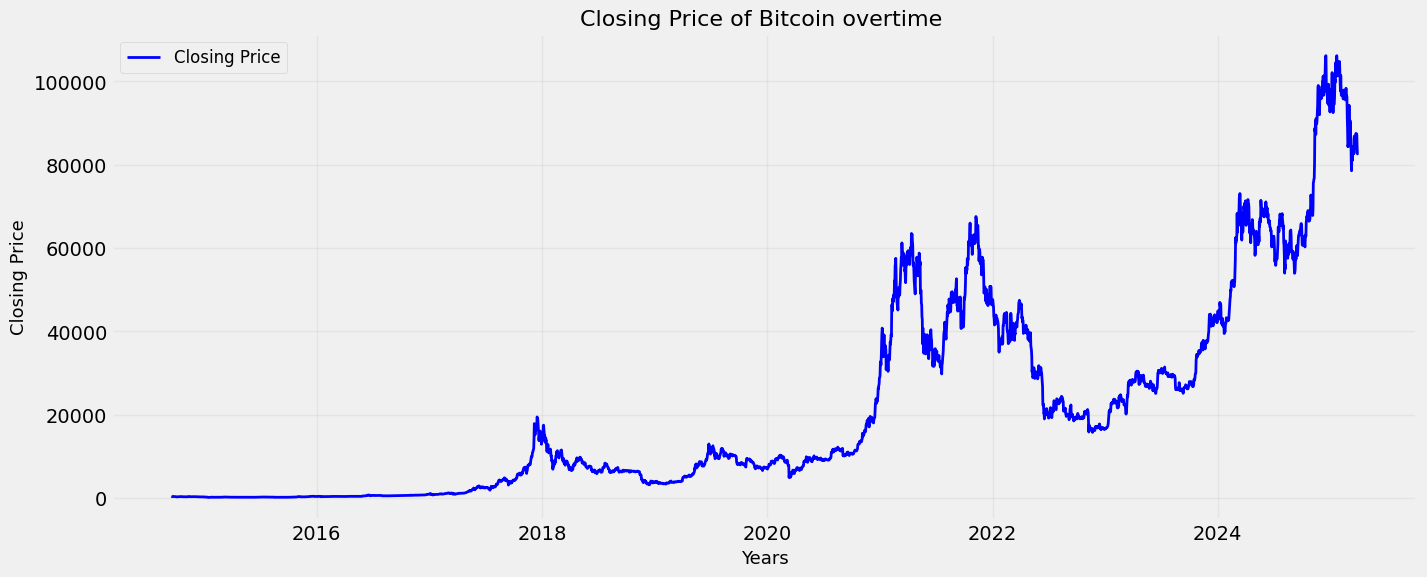

In [56]:
# plot closing prices
plt.figure(figsize = (15, 6)) # figure size
# x = closing_price.index and y = closing_price['Close']
plt.plot(closing_price.index, closing_price['Close'], label = 'Closing Price', color = 'blue', linewidth = 2)
plt.title('Closing Price of Bitcoin overtime ', fontsize = 16)
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Closing Price', fontsize = 13)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [57]:
# moving average calculation
# example
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 days ---> null null null null null 30.0 40.0
print(sum(temp_data[2:7])/5)

50.0


In [58]:
df1 = pd.DataFrame(temp_data)
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [59]:
for i in range(2014, 2025):
  print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [60]:
# calculate MA

# for 365 days
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
# for 100 days
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

<ipython-input-60-001ce6653c88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
<ipython-input-60-001ce6653c88>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


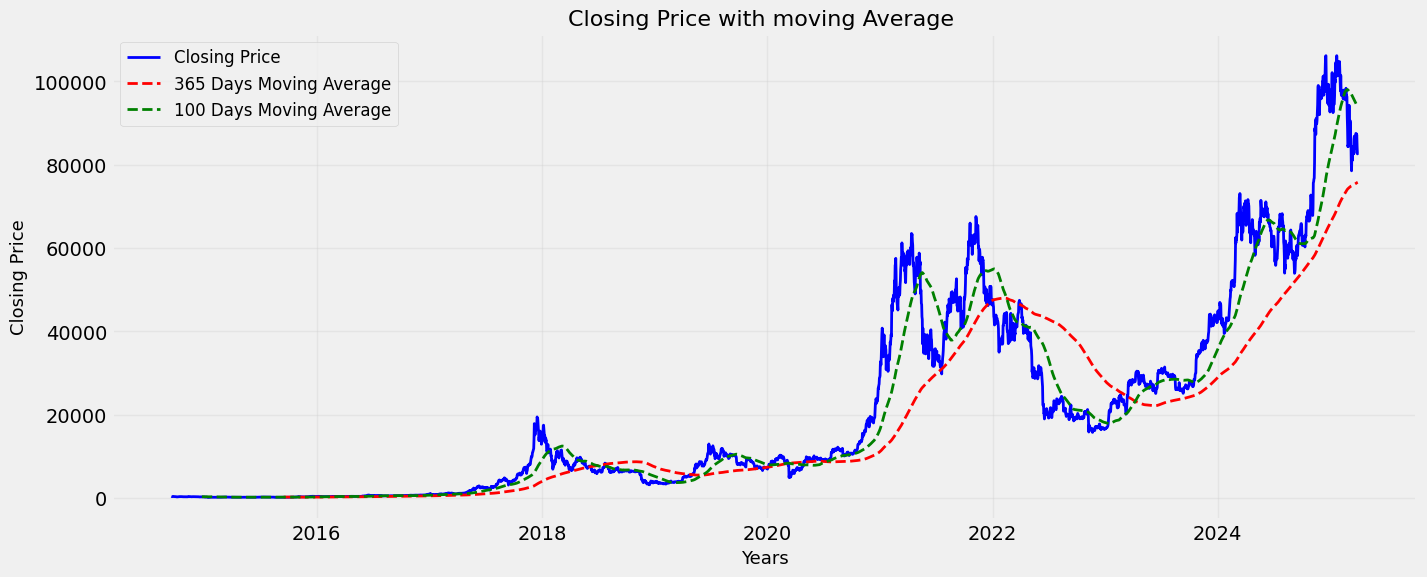

In [61]:
# plot closing prices
plt.figure(figsize = (15, 6)) # figure size
# x = closing_price.index and y = closing_price['Close'] and other details. (label, color...)
plt.plot(closing_price.index, closing_price['Close'], label = 'Closing Price', color = 'blue', linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red',linestyle='--', linewidth = 2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle='--', linewidth = 2)

plt.title('Closing Price with moving Average ', fontsize = 16)
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Closing Price', fontsize = 13)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [62]:
# LSTM = long short term memory
# scale data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) # range of values
# giving closing prices and drop NaN values
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())


In [63]:
scaled_data

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.79434279],
       [0.7777759 ],
       [0.77889394]])

In [64]:
len(scaled_data)

3848

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [66]:
from os import X_OK
# prepare data for LSTM

x_data = []
y_data = []
base_days = 100  # for 100 MA, first 100 days are not needed.

# for loop
for i in range(base_days, len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i]) # data between i-base_days and i are added to the list X
  y_data.append(scaled_data[i])  # only i value of the scaled data are added to list Y (target column)
# convert into numpy array
x_data = np.array(x_data)
y_data = np.array(y_data)

In [67]:
# split data into train and test sets
train_size = int(len(x_data)*0.9) # here 0.9 is training data precentage

# take 90% data. (first data to train_size data)
x_train, y_train = x_data[:train_size], y_data[:train_size]
# take 10% data. (train_size data to last data)(rest of the dataset)
x_test, y_test = x_data[train_size:], y_data[train_size:]


In [68]:
# model building
model = Sequential([
    LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(units = 64, return_sequences = False),
    Dense(units = 25),
    Dense(units = 1) # output layer
])

# not much understood


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()  # To see parameters

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
model.fit(x_train, y_train, batch_size = 5, epochs = 25)

Epoch 1/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - loss: 0.0023
Epoch 2/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 46s 69ms/step - loss: 2.7049e-04
Epoch 3/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 2.5086e-04
Epoch 4/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 1.5944e-04
Epoch 5/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - loss: 1.8361e-04
Epoch 6/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - loss: 1.1962e-04
Epoch 7/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 84s 71ms/step - loss: 1.2804e-04
Epoch 8/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 80s 69ms/step - loss: 1.5180e-04
Epoch 9/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 1.0177e-04
Epoch 10/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 1.0473e-04
Epoch 11/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 1.2731e-04
Epoch 12/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - loss: 1.1253e-04
Epoch 13/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 1.1835e-04
Epoch 14/25
675/675 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/s

In [71]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [72]:
# inverse transform of scaled data
inverse_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)


In [74]:
predictions

array([[0.6488244 ],
       [0.6271071 ],
       [0.61415035],
       [0.61567885],
       [0.643478  ],
       [0.6683106 ],
       [0.6700136 ],
       [0.66587734],
       [0.67634106],
       [0.66819704],
       [0.6658812 ],
       [0.67996246],
       [0.6657883 ],
       [0.6288873 ],
       [0.63208616],
       [0.65327996],
       [0.6485793 ],
       [0.65916574],
       [0.6633415 ],
       [0.6835282 ],
       [0.6619926 ],
       [0.67469454],
       [0.66905266],
       [0.6442716 ],
       [0.6137606 ],
       [0.62905884],
       [0.6083255 ],
       [0.612634  ],
       [0.58999175],
       [0.61005825],
       [0.6130709 ],
       [0.6245663 ],
       [0.62438333],
       [0.6415935 ],
       [0.6377136 ],
       [0.61902714],
       [0.61983556],
       [0.6124412 ],
       [0.60941267],
       [0.6065732 ],
       [0.6131684 ],
       [0.5848547 ],
       [0.5630949 ],
       [0.5693735 ],
       [0.6032281 ],
       [0.61388004],
       [0.61696845],
       [0.609

In [75]:
inverse_predictions

array([[ 68932.836],
       [ 66631.49 ],
       [ 65258.49 ],
       [ 65420.46 ],
       [ 68366.28 ],
       [ 70997.75 ],
       [ 71178.22 ],
       [ 70739.91 ],
       [ 71848.73 ],
       [ 70985.72 ],
       [ 70740.31 ],
       [ 72232.48 ],
       [ 70730.47 ],
       [ 66820.13 ],
       [ 67159.11 ],
       [ 69404.984],
       [ 68906.86 ],
       [ 70028.69 ],
       [ 70471.19 ],
       [ 72610.33 ],
       [ 70328.24 ],
       [ 71674.24 ],
       [ 71076.38 ],
       [ 68450.38 ],
       [ 65217.188],
       [ 66838.31 ],
       [ 64641.24 ],
       [ 65097.805],
       [ 62698.445],
       [ 64824.855],
       [ 65144.1  ],
       [ 66362.25 ],
       [ 66342.86 ],
       [ 68166.59 ],
       [ 67755.445],
       [ 65775.27 ],
       [ 65860.94 ],
       [ 65077.37 ],
       [ 64756.445],
       [ 64455.555],
       [ 65154.434],
       [ 62154.086],
       [ 59848.24 ],
       [ 60513.566],
       [ 64101.08 ],
       [ 65229.844],
       [ 65557.12 ],
       [ 6474

In [76]:
plotting_data = pd.DataFrame(
    {
        'Actual': inv_y_test.flatten(),
        'Predicted': inverse_predictions.flatten()
    }, index = closing_price.index[train_size+base_days:]
)

# not much understood

# Plotting Actual VS Predicted prices

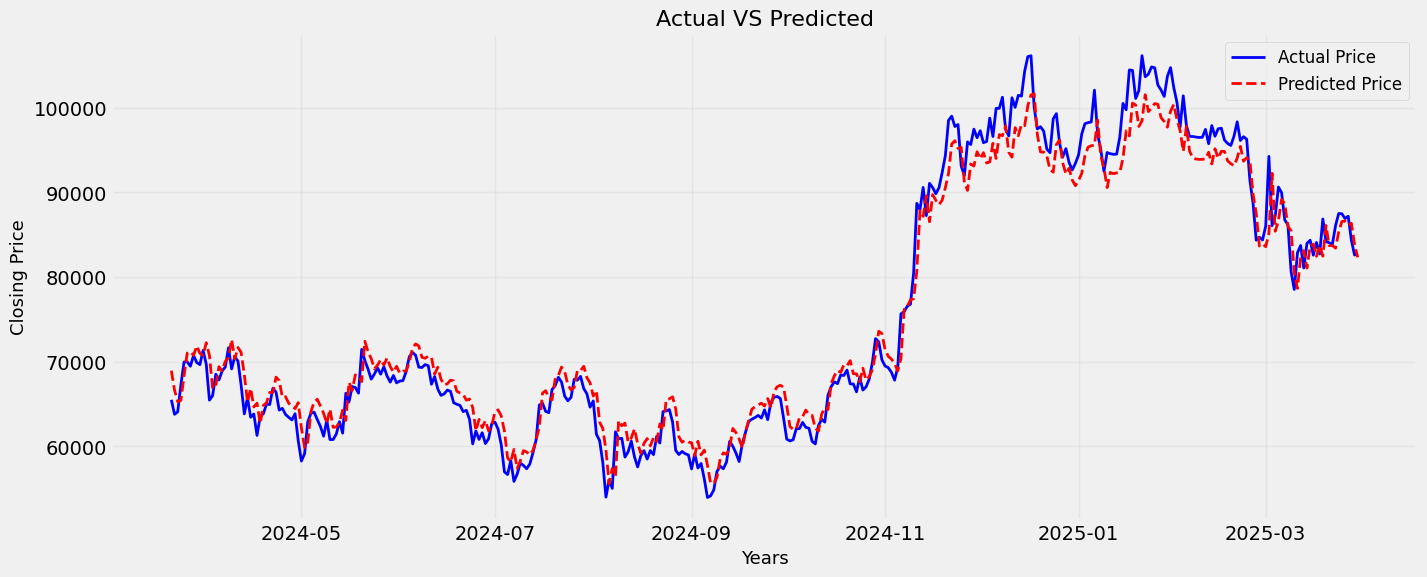

In [77]:
# plot closing prices
plt.figure(figsize = (15, 6)) # figure size
# x = closing_price.index and y = closing_price['Close'] and other details. (label, color...)
plt.plot(plotting_data.index, plotting_data['Actual'], label = 'Actual Price', color = 'blue', linewidth = 2)
plt.plot(plotting_data.index, plotting_data['Predicted'], label = 'Predicted Price', color = 'red',linestyle='--', linewidth = 2)

plt.title('Actual VS Predicted', fontsize = 16)
plt.xlabel('Years', fontsize = 13)
plt.ylabel('Closing Price', fontsize = 13)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

# Predict Future Day

In [78]:
last_100 = scaled_data[-100:].reshape(1,-1,1)
future_predictions = []

# predict for 10 days
for _ in range(10):
  next_days = model.predict(last_100)
  future_predictions.append(scaler.inverse_transform(next_days))
  last_100 = np.append(last_100[:,1:,:], next_days.reshape(1,1,-1), axis = 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [80]:
last_100

array([[[0.87999167],
        [0.88933933],
        [0.91262101],
        [0.92413914],
        [0.92535457],
        [0.92609757],
        [0.96160942],
        [0.91295912],
        [0.89522568],
        [0.87107235],
        [0.89199763],
        [0.89072499],
        [0.88998745],
        [0.89025249],
        [0.90929145],
        [0.94675973],
        [0.93970491],
        [0.9841063 ],
        [0.983597  ],
        [0.95228136],
        [0.96102979],
        [1.        ],
        [0.97647222],
        [0.97937028],
        [0.98747944],
        [0.98649012],
        [0.96731315],
        [0.96170002],
        [0.95457325],
        [0.97694539],
        [0.98668505],
        [0.96469466],
        [0.9481886 ],
        [0.92019028],
        [0.95526162],
        [0.92191574],
        [0.91005959],
        [0.90985058],
        [0.90924463],
        [0.90880457],
        [0.90897104],
        [0.91781767],
        [0.9018683 ],
        [0.92204823],
        [0.91013906],
        [0

In [81]:
future_predictions

[array([[82317.11]], dtype=float32),
 array([[81950.77]], dtype=float32),
 array([[81692.15]], dtype=float32),
 array([[81502.56]], dtype=float32),
 array([[81363.1]], dtype=float32),
 array([[81259.59]], dtype=float32),
 array([[81181.266]], dtype=float32),
 array([[81120.27]], dtype=float32),
 array([[81071.05]], dtype=float32),
 array([[81029.805]], dtype=float32)]

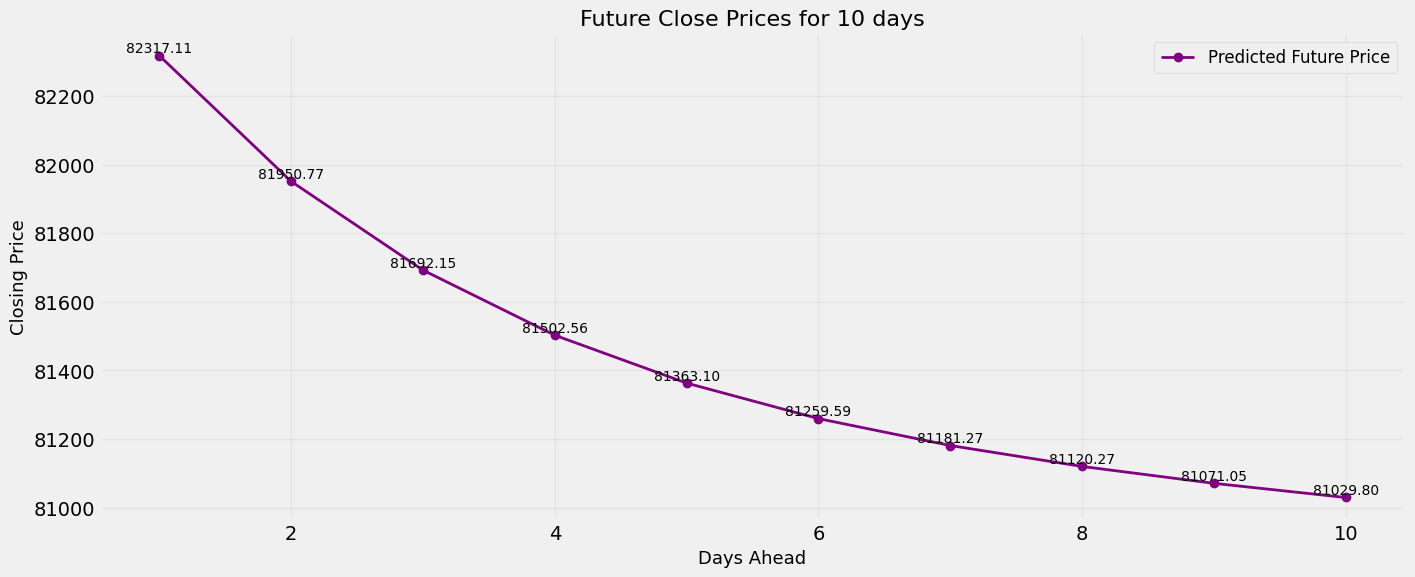

In [82]:
future_predictions = np.array(future_predictions).flatten()

# plot closing prices
plt.figure(figsize=(15, 6))  # figure size
# x = range and y = future predictions and other details (label, color...)
plt.plot(range(1, 11), future_predictions, marker='o', label='Predicted Future Price', color='purple', linewidth=2)

for i, val in enumerate(future_predictions):
    # Convert the value to a string and pass it as the 's' argument to plt.text
    plt.text(i + 1, val, f'{val:.2f}', fontsize=10, ha='center', va='bottom', color='black')

plt.title('Future Close Prices for 10 days', fontsize=16)
plt.xlabel('Days Ahead', fontsize=13)
plt.ylabel('Closing Price', fontsize=13)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


In [83]:
model.save("model.keras")